# Introduction to LCEL and LangGraph: LangChain Powered RAG

In the following notebook we're going to focus on learning how to navigate and build useful applications using LangChain, specifically LCEL, and how to integrate different APIs together into a coherent RAG application!

In the notebook, you'll complete the following Tasks:

- 🤝 Breakout Room #1:
  1. Install required libraries
  2. Set Environment Variables  
  3. Initialize a Simple Chain using LCEL
  4. Implement Naive RAG using LCEL
  5. Implement Simple RAG using LCEL

- 🤝 Breakout Room #2:
  1. Install LangGraph
  2. Understanding States and Nodes
  3. Building a Basic Graph
  4. Implementing a Simple RAG Graph
  5. Extending the Graph with Complex Flows

Let's get started!



# 🤝 Breakout Room #1

## Installing Required Libraries

One of the [key features](https://blog.langchain.dev/langchain-v02-leap-to-stability/) of LangChain v0.2.0 is the compartmentalization of the various LangChain ecosystem packages and added stability.

Instead of one all encompassing Python package - LangChain has a `core` package and a number of additional supplementary packages.

We'll start by grabbing all of our LangChain related packages!

> NOTE: DO NOT RUN THIS CELL IF YOU ARE RUNNING THIS NOTEBOOK LOCALLY

In [1]:
#!pip install -qU langchain==0.3.15 langchain-core==0.3.31 langchain-community==0.3.15 langchain-openai==0.3.1 langchain-qdrant==0.2.0 qdrant-client==1.13.2 tiktoken pymupdf==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.1 MB/s eta 0:00:00


## Set Environment Variables

We'll be leveraging OpenAI's suite of APIs - so we'll set our `OPENAI_API_KEY` `env` variable here!

In [6]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

## Initialize a Simple Chain using LCEL

The first thing we'll do is familiarize ourselves with LCEL and the specific ins and outs of how we can use it!

### LLM Orchestration Tool (LangChain)

Let's dive right into [LangChain](https://www.langchain.com/)!

The first thing we want to do is create an object that lets us access OpenAI's `gpt-4o` model.

In [7]:
from langchain_openai import ChatOpenAI

openai_chat_model = ChatOpenAI(model="gpt-4o-mini")

#### ❓ Question #1:

What other models could we use, and how would the above code change?

> HINT: Check out [this page](https://platform.openai.com/docs/models) to find the answer!

## Answer
If you are using Azure we could also do something like 
```
from langchain_openai import AzureChatOpenAI

```
We could also switch model to any chat models gpt-4o, gpt-40-mini and maybe also gpt-4.1
```
ChatOpenAI(model="gpt-4o")
```

### Prompt Template

Now, we'll set up a prompt template - more specifically a `ChatPromptTemplate`. This will let us build a prompt we can modify when we call our LLM!

In [8]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "You are a legendary and mythical Wizard. You speak in riddles and make obscure and pun-filled references to exotic cheeses."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

### Our First Chain

Now we can set up our first chain!

A chain is simply two components that feed directly into eachother in a sequential fashion!

You'll notice that we're using the pipe operator `|` to connect our `chat_prompt` to our `llm`.

This is a simplified method of creating chains and it leverages the LangChain Expression Language, or LCEL.

You can read more about it [here](https://python.langchain.com/v0.2/docs/concepts/#langchain-expression-language-lcel), but there a few features we should be aware of out of the box (taken directly from LangChain's documentation linked above):

- **Async, Batch, and Streaming Support** Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

- **Fallbacks** The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

- **Parallelism** Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

In the following code cell we have two components:

- `chat_prompt`, which is a formattable `ChatPromptTemplate` that contains a system message and a human message.
- `openai_chat_model`, which is a LangChain Runnable wrapped OpenAI client.

We'd like to be able to pass our own `content` (as found in our `human_template`) and then have the resulting message pair sent to our model and responded to!

In [9]:
chain = chat_prompt | openai_chat_model

Notice the pattern here:

We invoke our chain with the `dict` `{"content" : "Hello world!"}`.

It enters our chain:

`{"content" : "Hello world!"}` -> `invoke()` -> `chat_prompt`

Our `chat_prompt` returns a `PromptValue`, which is the formatted prompt. We then "pipe" the output of our `chat_prompt` into our `llm`.

`PromptValue` -> `|` -> `llm`

Our `llm` then takes the list of messages and provides an output which is return as a `str`!







In [10]:
print(chain.invoke({"content": "Hello world!"}))

content='Ah, greetings, seeker of wisdom! In a realm where cheddar dreams and gouda whispers intertwine, what riddles do you bring to the table of curds and lore? Perhaps a tale of Brie-lliant adventures or a quest for the elusive Roquefort of insight? Speak, and let us melt the fog of ignorance! 🧙\u200d♂️🧀' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 38, 'total_tokens': 117, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f7d56a8a2c', 'finish_reason': 'stop', 'logprobs': None} id='run-8834fa93-2961-4477-a455-dae198b8f7f5-0' usage_metadata={'input_tokens': 38, 'output_tokens': 79, 'total_tokens': 117, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reason

Let's try it out with a different prompt!

In [11]:
chain.invoke({"content" : "Could I please have some advice on how to become a better Python Programmer?"})

AIMessage(content="Ah, seeker of the code's elusive essence, listen well to the words of a cheese-savvy sage!\n\nTo sharpen thy skills in the Pythonic arts, heed these curdled truths, as if they were aged gouda, rich with flavor:\n\n1. **Practice with Purpose**: Delve deep into the dairy depths of projects! Create tools that echo the melty charm of fondue, where every string and list comes together in harmony. Just as each wheel of cheese must be refined, so too must your code be crafted with intention.\n\n2. **Script Serendipity**: Just as the subtle tang of Roquefort entices the palate, so too must you explore the libraries enchanting the Python realm. Discover the magic of NumPy, pandas, and Flask as you traverse the landscape, for they will amplify your coding prowess like fine Brie upon a cracker!\n\n3. **Embrace the Community**: Join the gatherings of the Pythonistas, both online and in the realm of meat and cheese platters! Engage in discussions, share your camembert-inspired qu

Notice how we specifically referenced our `content` format option!

Now that we have the basics set up - let's see what we mean by "Retrieval Augmented" Generation.

## Naive RAG - Manually adding context through the Prompt Template

Let's look at how our model performs at a simple task - defining what LangChain is!

We'll redo some of our previous work to change the `system_template` to be less...verbose.

In [12]:
system_template = "You are a helpful assistant."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

chat_chain = chat_prompt | openai_chat_model ### LCEL Chain!

print(chat_chain.invoke({"content" : "Please define LangGraph."}))

content='As of my last knowledge update in October 2023, "LangGraph" does not appear to be a widely recognized term or concept in the fields of technology, linguistics, or graph theory. However, it is possible that the name could refer to a specific project, framework, or application that has emerged more recently or is not commonly known.\n\nIf you have any specific context about what LangGraph refers to—such as its application area, whether it relates to language processing, graph databases, or something else—please provide that information, and I can help you better understand it. Alternatively, it could also be beneficial to check more recent sources or announcements for the latest developments regarding LangGraph.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 140, 'prompt_tokens': 22, 'total_tokens': 162, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_token

Well, that's not very good - is it!

The issue at play here is that our model was not trained on the idea of "LangChain", and so it's left with nothing but a guess - definitely not what we want the answer to be!

Let's ask another simple LangChain question!

In [13]:
print(chat_chain.invoke({"content" : "What is LangChain Expression Language (LECL)?"}))

content="LangChain Expression Language (LECL) is a feature of the LangChain framework designed for building applications that utilize language models. LECL allows users to create complex data processing and querying expressions in a way that is more intuitive and powerful compared to traditional programming approaches.\n\nHere are some key aspects of LECL:\n\n1. **Declarative Syntax**: LECL enables users to express their intentions declaratively. This means that users can specify what they want to achieve without needing to outline every detail of how to accomplish it. This can make code more readable and easier to maintain.\n\n2. **Integration with Language Models**: LECL is designed to work seamlessly with various language models. It allows developers to construct expressions that can leverage the capabilities of these models for tasks like text generation, summarization, data extraction, and more.\n\n3. **Data Processing**: LECL can be used for processing structured and unstructured

While it provides a confident response, that response is entirely ficticious! Not a great look, OpenAI!

However, let's see what happens when we rework our prompts - and we add the content from the docs to our prompt as context.

In [14]:
HUMAN_TEMPLATE = """
#CONTEXT:
{context}

QUERY:
{query}

Use the provide context to answer the provided user query. Only use the provided context to answer the query. If you do not know the answer, or it's not contained in the provided context response with "I don't know"
"""

CONTEXT = """
LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happening at every step. With LCEL, all steps are automatically logged to LangSmith for maximal observability and debuggability.
"""

chat_prompt = ChatPromptTemplate.from_messages([
    ("human", HUMAN_TEMPLATE)
])

chat_chain = chat_prompt | openai_chat_model

print(chat_chain.invoke({"query" : "What is LangChain Expression Language?", "context" : CONTEXT}))

content='LangChain Expression Language (LCEL) is a declarative way to compose chains together in a way that offers several advantages over traditional coding methods. It supports asynchronous, batch, and streaming operations, allowing for easy prototyping and exposure of chains in different interfaces. LCEL also allows for graceful error handling through fallbacks, enables parallel execution of components to improve efficiency, and integrates seamlessly with LangSmith for enhanced observability and debuggability as chains grow in complexity.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 282, 'total_tokens': 376, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_44added55e', 'finish_reason': 'stop', 'l

You'll notice that the response is much better this time. Not only does it answer the question well - but there's no trace of confabulation (hallucination) at all!

> NOTE: While RAG is an effective strategy to *help* ground LLMs, it is not nearly 100% effective. You will still need to ensure your responses are factual through some other processes

That, in essence, is the idea of RAG. We provide the model with context to answer our queries - and rely on it to translate the potentially lengthy and difficult to parse context into a natural language answer!

However, manually providing context is not scalable - and doesn't really offer any benefit.

Enter: Retrieval Pipelines.

## Implement Naive RAG using LCEL

Now we can make a naive RAG application that will help us bridge the gap between our Pythonic implementation and a fully LangChain powered solution!

## Putting the R in RAG: Retrieval 101

In order to make our RAG system useful, we need a way to provide context that is most likely to answer our user's query to the LLM as additional context.

Let's tackle an immediate problem first: The Context Window.

All (most) LLMs have a limited context window which is typically measured in tokens. This window is an upper bound of how much stuff we can stuff in the model's input at a time.

Let's say we want to work off of a relatively large piece of source data - like the Ultimate Hitchhiker's Guide to the Galaxy. All 898 pages of it!

> NOTE: It is recommended you do not run the following cells, they are purely for demonstrative purposes.

In [11]:
context = """
EVERY HITCHHIKER'S GUIDE BOOK
"""

We can leverage our tokenizer to count the number of tokens for us!

In [12]:
import tiktoken

enc = tiktoken.encoding_for_model("gpt-4o")

In [13]:
len(enc.encode(context))

12

The full set comes in at a whopping *636,144* tokens.

So, we have too much context. What can we do?

Well, the first thing that might enter your mind is: "Use a model with more context window", and we could definitely do that! However, even `gpt-4-128k` wouldn't be able to fit that whole text in the context window at once.

So, we can try splitting our document up into little pieces - that way, we can avoid providing too much context.

We have another problem now.

If we split our document up into little pieces, and we can't put all of them in the prompt. How do we decide which to include in the prompt?!

> NOTE: Content splitting/chunking strategies are an active area of research and iterative developement. There is no "one size fits all" approach to chunking/splitting at this moment. Use your best judgement to determine chunking strategies!

In order to conceptualize the following processes - let's create a toy context set!

### TextSplitting aka Chunking

We'll use the `RecursiveCharacterTextSplitter` to create our toy example.

It will split based on the following rules:

- Each chunk has a maximum size of 100 tokens
- It will try and split first on the `\n\n` character, then on the `\n`, then on the `<SPACE>` character, and finally it will split on individual tokens.

Let's implement it and see the results!

In [15]:
import tiktoken
from langchain.text_splitter import RecursiveCharacterTextSplitter

def tiktoken_len(text):
    tokens = tiktoken.encoding_for_model("gpt-4o-mini").encode(
        text,
    )
    return len(tokens)

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0,
    length_function = tiktoken_len,
)

In [16]:
chunks = text_splitter.split_text(CONTEXT)

In [17]:
len(chunks)

3

In [18]:
for chunk in chunks:
  print(chunk)
  print("----")

LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.
----
Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.
----
Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happening at ev

As is shown in our result, we've split each section into 100 token chunks - cleanly separated by `\n\n` characters!

####🏗️ Activity #1:

While there's nothing specifically wrong with the chunking method used above - it is a naive approach that is not sensitive to specific data formats.

Brainstorm some ideas that would split large single documents into smaller documents.

1. `Semantic chunking`: Split documents based on semantic meaning rather than character count. This involves using embeddings to identify natural topic boundaries or using NLP techniques to detect when the subject or topic changes. This preserves the coherence of related information within chunks.

2. `Structure-aware chunking`: Parse the document structure (e.g., headers, sections, paragraphs) and split according to the document's inherent organization. For HTML, split by div/section tags; for Markdown, split by headers; for academic papers, split by abstract/introduction/methods/results/discussion sections.

3. `Sliding window with overlap`: Instead of fixed chunks with minimal overlap, use larger overlaps (e.g., 50%) between chunks to maintain context between adjacent segments. This ensures that related information split across chunk boundaries isn't lost, improving retrieval quality for queries that might reference concepts spanning these boundaries.

## Embeddings and Dense Vector Search

Now that we have our individual chunks, we need a system to correctly select the relevant pieces of information to answer our query.

This sounds like a perfect job for embeddings!

We'll be using OpenAI's `text-embedding-3` model as our embedding model today!

Let's load it up through LangChain.

In [19]:
from langchain_openai.embeddings import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings(model="text-embedding-3-small")

In [20]:
print(embedding_model)

client=<openai.resources.embeddings.Embeddings object at 0x116e7be90> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x116e86b10> model='text-embedding-3-small' dimensions=None deployment='text-embedding-ada-002' openai_api_version=None openai_api_base=None openai_api_type=None openai_proxy=None embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True


#### ❓ Question #2:

What is the embedding dimension, given that we're using `text-embedding-3-small`?

You will need to fill the next cell out correctly with your embedding dimension for the rest of the notebook to run.

> HINT: Check out the [docs](https://platform.openai.com/docs/guides/embeddings) to help you answer this question.

In [21]:
embedding_dim =  1536

### Using A Vector Database - Intoduction to Qdrant

Up to this point, we've been using a dictionary to hold our embeddings - typically, we'll want to use a more robust strategy.

In this bootcamp - we'll be focusing on leveraging [Qdrant's vector database](https://qdrant.tech/qdrant-vector-database/).

Let's take a look at how we set-up Qdrant!

> NOTE: We'll be spending a lot of time learning about Qdrant throughout the remainder of our time together - but for an initial primer, please check out [this resource](https://qdrant.tech/articles/what-is-a-vector-database/)

We are going to be using an "in-memory" Qdrant client, which means that our vectors will be held in our system's memory (RAM) - this is useful for prototyping and developement at smaller scales - but would need to be modified when moving to production. Luckily for us, this modification is trivial!

> NOTE: While LangChain uses the terminology "VectorStore" (also known as a Vector Library), Qdrant is a "Vector Database" - more info. on that [here](https://weaviate.io/blog/vector-library-vs-vector-database).

In [23]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

client = QdrantClient(":memory:")

Next, we need to create a collection - a collection is a specific...collection of vectors within the Qdrant client.

These are useful as they allow us to create multiple different "warehouses" in a single client, which can be leveraged for personalization and more!

Also notice that we define what our vector shapes are (embedding dim) as well as our desired distance metric.

In [24]:
client.create_collection(
    collection_name="lcel_doc_v1",
    vectors_config=VectorParams(size=embedding_dim, distance=Distance.COSINE),
)

True

Now we can assemble our vector database! Notice that we provide our client, our created collection, and our embedding model!

In [25]:
vector_store = QdrantVectorStore(
    client=client,
    collection_name="lcel_doc_v1",
    embedding=embedding_model,
)

Now that we have our vector database set-up

In [26]:
_ = vector_store.add_texts(texts=chunks)

### Creating a Retriever

Now that we have an idea of how we're getting our most relevant information - let's see how we could create a pipeline that would automatically extract the closest chunk to our query and use it as context for our prompt!

This will involve a popular LangChain interace known as `as_retriever`!

> NOTE: We can still specify how many documents we wish to retrieve per vector.

In [27]:
retriever = vector_store.as_retriever(search_kwargs={"k": 2})

## Bringing it All Together

Now that we have our Retriever, our promt Augmentation, and our Generator - we're ready to create a simple RAG chain using LCEL!

This chain does the following things:

1. It takes in some `str` and passes it to two different LCEL Runnables:
  - `retriever`, which takes the string and calls `retrieve` on it - passing the output (formatted as a list) to the `dict` under the key `context`
  - `RunnablePassthrough()` which simply propogates the `str` to the `dict` under the key `query`.
2. It chains the `dict` to format the `chat_prompt` which expects both a `query` and `context`
3. It chains the resulting message to the LLM, and calls it - returning a full response
4. That response is chained to the `StrOutputParser()` which converts the response blob into a `str` containing the content of the response!

In [28]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

simple_rag  = (
    {"context": retriever, "query": RunnablePassthrough()}
    | chat_prompt
    | openai_chat_model
    | StrOutputParser()
)

In [41]:
simple_rag.invoke("What does LCEL do that makes it more reliable at scale?")

'LCEL makes it more reliable at scale by allowing for graceful error handling through fallbacks, which is important given the non-determinism of LLMs. Additionally, it supports parallelism for components that can be run concurrently, which is beneficial for managing long API calls typical in LLM applications. This capability to run components in parallel enhances the reliability and efficiency of the overall process.'

#### ❓ Question #3:

What does LCEL do that makes it more reliable at scale?

> HINT: Use your newly created `simple_rag` to help you answer this question!

#### ANSWER
'LCEL makes it more reliable at scale by allowing for graceful error handling through fallbacks, which is important given the non-determinism of LLMs. Additionally, it supports parallelism for components that can be run concurrently, which is beneficial for managing long API calls typical in LLM applications. This capability to run components in parallel enhances the reliability and efficiency of the overall process.'
> HINT : I used simple rag :) 

To add it also allows to define fallback runnables in case a primary one fails or conditionaly route based on intermediate or any output.

### A Note On Runnables

# Understanding LangChain Runnables and LCEL

In LangChain, a Runnable is like a LEGO brick in your AI application - it's a standardized component that can be easily connected with other components. The real power of Runnables comes from their ability to be combined in flexible ways using LCEL (LangChain Expression Language).

## Key Features of Runnables

### 1. Universal Interface
Every Runnable in LangChain follows the same pattern:
- Takes an input
- Performs some operation
- Returns an output

This consistency means you can treat different components (like models, retrievers, or parsers) in the same way.

### 2. Built-in Parallelization
Runnables come with methods for handling multiple inputs efficiently:
```python
# Process inputs in parallel, maintain order
results = chain.batch([input1, input2, input3])

# Process inputs as they complete
for result in chain.batch_as_completed([input1, input2, input3]):
    print(result)
```

### 3. Streaming Support
Perfect for responsive applications:
```python
# Stream outputs as they're generated
for chunk in chain.stream({"query": "Tell me a story"}):
    print(chunk, end="", flush=True)
```

### 4. Easy Composition
The `|` operator makes building pipelines intuitive:
```python
# Create a basic RAG chain
rag_chain = retriever | prompt | model | output_parser
```

## Common Types of Runnables

- **Language Models**: Like our `ChatOpenAI` instance
- **Prompt Templates**: Format inputs consistently
- **Retrievers**: Get relevant context from a vector store
- **Output Parsers**: Structure model outputs
- **LangGraph Nodes**: Individual components in our graph

Think of Runnables as the building blocks of your LLM application. Just like how you can combine LEGO bricks in countless ways, you can mix and match Runnables to create increasingly sophisticated applications!



# 🤝 Breakout Room #2

## LangGraph Based RAG

Now that we have a reasonable grasp of LCEL and the idea of Runnables - let's see how we can use LangGraph to build the same system!

### Primer: What is LangGraph?
LangGraph is a tool that leverages LangChain Expression Language to build coordinated multi-actor and stateful applications that includes cyclic behaviour.

#### Why Cycles?
In essence, we can think of a cycle in our graph as a more robust and customizable loop. It allows us to keep our application agent-forward while still giving the powerful functionality of traditional loops.

Due to the inclusion of cycles over loops, we can also compose rather complex flows through our graph in a much more readable and natural fashion. Effectively allowing us to recreate application flowcharts in code in an almost 1-to-1 fashion.

#### Why LangGraph?
Beyond the agent-forward approach - we can easily compose and combine traditional "DAG" (directed acyclic graph) chains with powerful cyclic behaviour due to the tight integration with LCEL. This means it's a natural extension to LangChain's core offerings!

> NOTE: We're going to focus on building a simple DAG for today's assignment as an introduction to LangGraph

In [46]:
#!pip install -qU langgraph

### Putting the State in Stateful

Earlier we used this phrasing:

> coordinated multi-actor and stateful applications

So what does that "stateful" mean?

To put it simply - we want to have some kind of object which we can pass around our application that holds information about what the current situation (state) is. Since our system will be constructed of many parts moving in a coordinated fashion - we want to be able to ensure we have some commonly understood idea of that state.

LangGraph leverages a `StatefulGraph` which uses an `AgentState` object to pass information between the various nodes of the graph.

There are more options than what we'll see below - but this `AgentState` object is one that is stored in a `TypedDict` with the key `messages` and the value is a `Sequence` of `BaseMessages` that will be appended to whenever the state changes.

However, in our example here, we're focusing on a simpler `State` object:

```python
class State(TypedDict):
    question: str
    context: list[Document]
    response: str
```

Let's think about a simple example to help understand exactly what this means (we'll simplify a great deal to try and clearly communicate what state is doing):

1. **We initialize our state object**:
   ```python
   {
       "question": "",
       "context": [],
       "response": ""
   }
   ```

2. **Our user submits a query to our application.**  
   We store the user's question in `state["question"]`. Now we have:
   ```python
   {
       "question": "How tall is the Eiffel Tower?",
       "context": [],
       "response": ""
   }
   ```

3. **We pass our state object to an Agent node** which is able to read the current state. It will use the value of `state["question"]` as input and might retrieve some context documents related to the question. It then generates a response which it stores in `state["response"]`. For example:
   ```python
   {
       "question": "How tall is the Eiffel Tower?",
       "context": [Document(page_content="...some data...")],
       "response": "The Eiffel Tower is about 324 meters tall..."
   }
   ```

That's it! The important part is that we have a consistent object (`State`) that's passed around, holding the crucial information as we go from one node to the next. This ensures our application has a single source of truth about what has happened so far and what is happening now.



In [30]:
from langgraph.graph import START, StateGraph
from typing_extensions import TypedDict
from langchain_core.documents import Document

class State(TypedDict):
  question: str
  context: list[Document]
  response: str

Now that we have state, and we have tools, and we have an LLM - we can finally start making our graph!

Let's take a second to refresh ourselves about what a graph is in this context.

Graphs, also called networks in some circles, are a collection of connected objects.

The objects in question are typically called nodes, or vertices, and the connections are called edges.

Let's look at a simple graph.

![image](https://i.imgur.com/2NFLnIc.png)

Here, we're using the coloured circles to represent the nodes and the yellow lines to represent the edges. In this case, we're looking at a fully connected graph - where each node is connected by an edge to each other node.

If we were to think about nodes in the context of LangGraph - we would think of a function, or an LCEL Runnable.

If we were to think about edges in the context of LangGraph - we might think of them as "paths to take" or "where to pass our state object next".  

### Building Nodes

We're going to need two nodes:

A node for retrieval, and a node for generation.

Let's start with our `retrieve` node!

Notice how we do not need to update the state object in the node, but can instead return a modification directly to our state.

In [31]:
def retrieve(state: State) -> State:
  retrieved_docs = retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

Next, let's create our `generate` node - which will leverage some LCEL!

In [32]:
def generate(state: State) -> State:
  generation_chain = chat_prompt | openai_chat_model | StrOutputParser()
  response = generation_chain.invoke({"query" : state["question"], "context" : state["context"]})
  return {"response" : response}

Now we can start defining our graph!

Think of the graph's state as a blank canvas that we can add nodes and edges to.

Every graph starts with two special nodes - START and END - the act as the entry and exit point to the other nodes in the graphs.  

All valid graphs must start at the START node and end at the END node.

In [33]:
# Start with the blank canvas
graph_builder = StateGraph(State)

Now we can add a sequence to our "canvas" (graph) - this can be done by providing a list of nodes, the will automatically have edges that connect the i-th element to the i+1-th element in the list. The final element will be added to the END node unless otherwise specified.

In [34]:
graph_builder = graph_builder.add_sequence([retrieve, generate])

Next, let's connect our START node to our `retrieve` node by adding an edge.

In [35]:
graph_builder.add_edge(START, "retrieve")

Finally we can compile our graph! This will do basic verification to ensure that the Runnables have the correct inputs/outputs and can be matched.

In [36]:
graph = graph_builder.compile()

Finally, we can visualize our graph!

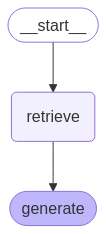

In [37]:
graph

Let's take it for a spin!

We invoke our graph like we do any other Runnable in LCEL!

> NOTE: That's right, even a compiled graph is a Runnable!

In [38]:
response = graph.invoke({"question" : "How does LCEL work?"})
response["response"]

'LangChain Expression Language (LCEL) is a declarative method for composing chains together, offering several benefits over traditional coding approaches. Specifically, LCEL allows for automatic support for synchronous, asynchronous, batch, and streaming operations, making it easy to prototype in environments like Jupyter notebooks and then transition to async streaming interfaces. Additionally, LCEL facilitates error handling through fallbacks, which is crucial given the non-determinism of language model outputs. It also supports parallelism, allowing components that can be executed concurrently to run in parallel, which is beneficial for managing long API calls in LLM applications.'

In [39]:
response

{'question': 'How does LCEL work?',
 'context': [Document(metadata={'_id': 'd847d5349da34e838b9fa126b11b878d', '_collection_name': 'lcel_doc_v1'}, page_content='LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):\n\nAsync, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.'),
  Document(metadata={'_id': 'ae00aa12280b40da828ce0d01e45e281', '_collection_name': 'lcel_doc_v1'}, page_content='Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.\n\nParallelism Since LLM applications involve (sometimes long) API calls, it often becomes impor

In [40]:
response = graph.invoke({"question" : "Who is Batman?"})
response["response"]

"I don't know"

#### ❓ Question #4:
LangGraph's graph-based approach lets us visualize and manage complex flows naturally. How could we extend our current implementation to handle edge cases? For example:
- What if the retriever finds no relevant context?  
- What if the response needs fact-checking?
Consider how you would modify the graph to handle these scenarios.

In [69]:
from langgraph.graph import START, END, StateGraph
from typing_extensions import TypedDict
from langchain_core.documents import Document

class State(TypedDict):
  question: str
  context: list[Document]
  response: str

def check_context_relevance(state: State) -> dict:
    # If no documents were returned at all
    if not state["context"] or len(state["context"]) == 0:
        return {"branch": "no_context"}
    
    # Check if the context is actually relevant to the question
    question = state["question"]
    context_text = " ".join([doc.page_content for doc in state["context"]])
    
    # Use the embedding model to check relevance between question and context
    relevance_prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a relevance detector. Your job is to determine if the provided context contains information related to the question."),
        ("human", "Question: {question}\nContext: {context}\nIs this context relevant to answering this question? Answer with ONLY 'relevant' or 'not_relevant'.")
    ])
    
    relevance_chain = relevance_prompt | openai_chat_model | StrOutputParser()
    relevance_result = relevance_chain.invoke({
        "question": question,
        "context": context_text
    })
    
    if "relevant" in relevance_result.lower():
        return {"branch": "has_context"}
    else:
        return {"branch": "no_context"}

# A fallback node to handle when no context is found
def handle_no_context(state: State) -> State:
    response = "I don't have enough relevant information to answer this question. Could you please rephrase or ask something related to LangChain or LCEL?"
    return {"response": response}


def generate(state: State) -> State:
    question = state["question"]
    context_docs = state["context"]
    
    # Convert context documents to text
    context_text = " ".join([doc.page_content for doc in context_docs])
    
    # Create a prompt that handles irrelevant questions better
    enhanced_prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a helpful assistant specialized in LangChain and LCEL. If the question can be answered using the provided context, provide a detailed response. If the context doesn't contain information relevant to the question, politely explain that you don't have that information."),
        ("human", "Question: {query}\nContext: {context}\n\nProvide a helpful response based on the context.")
    ])
    
    generation_chain = enhanced_prompt | openai_chat_model | StrOutputParser()
    response = generation_chain.invoke({
        "query": question, 
        "context": context_text
    })
    
    return {"response": response}

# Now let's rebuild our graph with this logic
graph_builder = StateGraph(State)

# Add nodes
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("check_relevance", check_context_relevance)
graph_builder.add_node("generate", generate)
graph_builder.add_node("handle_no_context", handle_no_context)

# Add edges
graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "check_relevance")

# Router setup for conditional branches
graph_builder.add_conditional_edges(
    "check_relevance",
    lambda x: x["branch"],  # This extracts the branch key from the output
    {
        "has_context": "generate",
        "no_context": "handle_no_context"
    }
)
graph_builder.add_edge("generate", END)
graph_builder.add_edge("handle_no_context", END)

# Compile the graph
graph = graph_builder.compile()

In [70]:
graph.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'retrieve': Node(id='retrieve', name='retrieve', data=retrieve(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={'writer': False, 'store': False, 'previous': False}), metadata=None), 'check_relevance': Node(id='check_relevance', name='check_relevance', data=check_relevance(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={'writer': False, 'store': False, 'previous': False}), metadata=None), 'generate': Node(id='generate', name='generate', data=generate(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={'writer': False, 'store': False, 'previous': False}), metadata=None), 'handle_no_context': Node(id='handle_no_context', name='handle_no_context', data=handle_no_context(tags=None, recurse=True, explode_args=False, func_accepts_config=False, fu

In [93]:
def draw_graph(graph,output_file_png):
    try:
        # Get the graph representation
        graph_representation = graph.get_graph()

        # Draw and save to a PNG file
        # output_file_png = "my_compiled_graph.png"
        graph_representation.draw_png(output_file_path=output_file_png)
        print(f"Graph visualization saved to {output_file_png}")
        # Optional: If you are in a Jupyter Notebook/Lab, you can display it directly
        # from IPython.display import Image
        # display(Image(graph_representation.draw_png()))
    except ImportError:
        print("Install pygraphviz or pydot and Graphviz to draw PNGs.")
        print("pip install pygraphviz")
        print("Then ensure Graphviz is installed system-wide (e.g., 'brew install graphviz' or 'sudo apt install graphviz').")
    except Exception as e:
        print(f"An error occurred during PNG generation: {e}")

In [94]:
draw_graph(graph,"my_compiled_graph.png")

Graph visualization saved to my_compiled_graph.png


![Alt text](./my_compiled_graph.png)

### Answer (Friendly response when no context)


In [73]:
response = graph.invoke({"question": "What is LCEL?"})
print(response["response"])
print("**"*100)
# Try with a question not in the context
response = graph.invoke({"question": "Who is Batman?"})
print(response["response"])

LCEL, or LangChain Expression Language, is a declarative framework designed to simplify the process of composing chains in LangChain applications. It offers several advantages over traditional coding methods. Here are the key features and benefits:

1. **Async, Batch, and Streaming Support**: Chains created using LCEL automatically support synchronous, asynchronous, batch processing, and streaming functionality. This flexibility allows developers to prototype their chains in a Jupyter notebook with synchronous operations and later deploy them with asynchronous streaming capabilities.

2. **Fallbacks**: Given the non-deterministic nature of large language models (LLMs), it's crucial to handle errors effectively. LCEL enables developers to easily integrate fallback mechanisms into any chain, ensuring that the application can gracefully manage unexpected issues.

3. **Parallelism**: LLM applications often involve making lengthy API calls, which can benefit from concurrent execution. LCEL'

### Answer Adding Fact Check

In [80]:
# Let's add a fact-checking node
def fact_check(state: State) -> dict:
    # Here we check if the response is factually accurate based on the context
    question = state["question"]
    response = state["response"] 
    context_docs = state["context"]
    
    # Convert context documents to text
    context_text = " ".join([doc.page_content for doc in context_docs])
    
    # Using the LLM to verify if the response is supported by the context
    verification_prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a fact-checking assistant. Your job is to verify if the response is supported by the provided context."),
        ("human", "Question: {question}\nResponse: {response}\nContext: {context}\nIs the response factually consistent with the context? Reply ONLY with either 'verified' or 'needs_correction'.")
    ])
    
    verification_chain = verification_prompt | openai_chat_model | StrOutputParser()
    result = verification_chain.invoke({
        "question": question,
        "response": response,
        "context": context_text
    })
    
    # Return the appropriate next step based on verification
    if "verified" in result.lower():
        return {"branch": "factual"}
    else:
        return {"branch": "needs_correction"}

# Function to correct responses that are not factual
def correct_response(state: State) -> State:
    question = state["question"]
    original_response = state["response"]
    context_docs = state["context"]
    
    # Convert context documents to text
    context_text = " ".join([doc.page_content for doc in context_docs])
    
    correction_prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a fact-checking assistant. Your job is to correct responses to ensure they are factually consistent with the provided context."),
        ("human", "Question: {question}\nOriginal Response: {response}\nContext: {context}\n\nPlease provide a corrected response that is factually consistent with the context.")
    ])
    
    correction_chain = correction_prompt | openai_chat_model | StrOutputParser()
    corrected_response = correction_chain.invoke({
        "question": question,
        "response": original_response,
        "context": context_text
    })
    
    return {"response": corrected_response}

# Now let's rebuild our graph with both features
graph_builder = StateGraph(State)

# Add nodes
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("check_relevance", check_context_relevance)
graph_builder.add_node("generate", generate)
graph_builder.add_node("handle_no_context", handle_no_context)
graph_builder.add_node("fact_check", fact_check)
graph_builder.add_node("correct_response", correct_response)

# Add edges
graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "check_relevance")

graph_builder.add_conditional_edges(
    "check_relevance",
    lambda x: x["branch"],
    {
        "has_context": "generate",
        "no_context": "handle_no_context"
    }
)
graph_builder.add_edge("generate", "fact_check")

graph_builder.add_conditional_edges(
    "fact_check",
    lambda x: x["branch"],
    {
        "factual": END,
        "needs_correction": "correct_response"
    }
)
graph_builder.add_edge("correct_response", END)
graph_builder.add_edge("handle_no_context", END)

# Compile the graph
graph = graph_builder.compile()

In [84]:
draw_graph(graph,"fact_check_graph.png")

Graph visualization saved to fact_check_graph.png


![Alt text](./fact_check_graph.png)


In [85]:
# Test with questions likely to produce different fact-check outcomes

# 1. Question well-covered by context (should be factual):
factual_question = "What capabilities does LCEL provide for parallel execution?"

# 2. Question partially covered but potentially confusing (might need correction):
ambiguous_question = "When was LCEL released and what version is it on now?"

# 3. Question that might lead to hallucination (should need correction):
hallucination_question = "How does LCEL compare to Microsoft's FLAME framework?"

# Run tests with each type of question
print("TESTING FACTUAL QUESTION:")
result1 = graph.invoke({"question": factual_question})
print(result1["response"])
print("\n" + "-"*50 + "\n")

print("TESTING AMBIGUOUS QUESTION:")
result2 = graph.invoke({"question": ambiguous_question})
print(result2["response"])
print("\n" + "-"*50 + "\n")

print("TESTING HALLUCINATION-PRONE QUESTION:")
result3 = graph.invoke({"question": hallucination_question})
print(result3["response"])

TESTING FACTUAL QUESTION:
LCEL (LangChain Expression Language) provides robust capabilities for parallel execution, which is crucial for optimizing performance in LLM (Large Language Model) applications. Here are the key features related to parallel execution supported by LCEL:

1. **Automatic Parallel Execution**: LCEL syntax is designed to automatically run any components that can be executed in parallel. This means you can leverage the ability to handle multiple API calls simultaneously, improving the overall efficiency and speed of your applications.

2. **Support for Asynchronous Operations**: The chains built using LCEL support asynchronous execution. This allows for non-blocking API calls, meaning that while one component is processing, others can run concurrently without waiting for each to complete.

3. **Batch Processing**: LCEL facilitates batch execution, which is useful when you need to process a large set of inputs at once. This capability not only saves time but also opt

### Testing correction flow

In [91]:
# 1. Test the factual flow - a question that should give a factual response
factual_test = graph.invoke({"question": "What is LCEL and what benefits does it provide?"})
print("FACTUAL TEST RESULT:")
print(factual_test["response"])
print("\n" + "-"*50 + "\n")

# 2. Test the correction flow by forcing an incorrect response
def generate_with_error(state: State) -> State:
    """This function deliberately generates an incorrect response to trigger fact-checking"""
    return {"response": "LCEL (LangChain Expression Language) is a programming language created in 2010 that focuses on blockchain and cryptocurrency applications. It has no support for asynchronous operations."}

# Create a modified graph for testing correction
correction_test_builder = StateGraph(State)
correction_test_builder.add_node("retrieve", retrieve)
correction_test_builder.add_node("generate_with_error", generate_with_error)
correction_test_builder.add_node("fact_check", fact_check)
correction_test_builder.add_node("correct_response", correct_response)

correction_test_builder.add_edge(START, "retrieve")
correction_test_builder.add_edge("retrieve", "generate_with_error")
correction_test_builder.add_edge("generate_with_error", "fact_check")
correction_test_builder.add_conditional_edges(
    "fact_check",
    lambda x: x["branch"],
    {
        "factual": END,
        "needs_correction": "correct_response"
    }
)
correction_test_builder.add_edge("correct_response", END)

correction_test_graph = correction_test_builder.compile()

# Run the correction test
correction_result = correction_test_graph.invoke({"question": "What is LCEL and what benefits does it provide?"})
print("CORRECTION TEST RESULT:")
print(correction_result["response"])

FACTUAL TEST RESULT:
LCEL, or LangChain Expression Language, is a declarative framework designed to facilitate the composition of chains in a streamlined manner. It offers several notable benefits:

1. **Async, Batch, and Streaming Support**: Chains defined using LCEL inherently support synchronous, asynchronous, batching, and streaming operations. This flexibility allows developers to prototype chains in an interactive environment like Jupyter notebooks, utilizing a synchronous interface, and later transition to an asynchronous and streaming model without significant rework.

2. **Fallbacks**: Given the non-deterministic nature of large language models (LLMs), it's critical to design applications that can gracefully manage errors. LCEL enables users to easily integrate fallback mechanisms into any chain, ensuring that the application can handle failures more effectively and maintain functionality.

3. **Parallelism**: In applications that utilize LLMs, there are often lengthy API call

In [92]:
draw_graph(correction_test_graph,"correction_test_graph.png")

Graph visualization saved to correction_test_graph.png


![ALT](./correction_test_graph.png)